In [1]:
import warnings

import dandelion as ddl
import pandas as pd
import scanpy as sc

from numba.core.errors import (
    NumbaDeprecationWarning,
)  # silence numba deprecation warning
from pathlib import Path

warnings.simplefilter("ignore", category=NumbaDeprecationWarning)
warnings.simplefilter("ignore", category=FutureWarning)
sc.settings.verbosity = 0

sc.logging.print_header()
ddl.logging.print_header()

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.4 scipy==1.11.2 pandas==1.5.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10
dandelion==0.3.4.dev11 pandas==1.5.3 numpy==1.24.4 matplotlib==3.7.1 networkx==3.1 scipy==1.11.2


In [2]:
DATA_PATH = Path("..") / "data"
LOCAL_PATH = DATA_PATH / "local"

In [5]:
bdata = sc.read(LOCAL_PATH / "adata_umap_bcr.h5ad")
bdata

AnnData object with n_obs × n_vars = 53648 × 1871
    obs: 'sample_id_actual', 'culture_id', 'Treatment', 'Timepoint', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'scrublet_score', 'is_doublet', 'filter_rna', 'batch', 'leiden', 'celltype', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'sample_id', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_genotyped_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_genotyped_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_genotyped_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_genotyped_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'duplicate_count_B_VDJ', 'duplicate_count_B_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_

In [8]:
from tools import combine_two_categories

combine_two_categories(bdata, "sample_id_actual", "celltype")

In [10]:
pd.crosstab(bdata.obs["sample_id_actual_celltype"], bdata.obs["chain_status"])

chain_status,Extra pair,Extra pair-exception,No_contig,Orphan VDJ,Single pair
sample_id_actual_celltype,,,,,
BC1-CD40-72h_Ambiguous,1,0,1032,0,8
BC1-CD40-72h_B1,0,0,40,0,5
BC1-CD40-72h_B_CD21negCD23pos,472,10,2133,8,2742
BC1-CD40-72h_B_CD21negCD23posCxcr4pos,1,0,16,0,23
BC1-CD40-72h_B_CD21posCD23neg,0,0,2,0,0
BC1-CD40-72h_B_CD21posCD23neg_non-proliferating,0,0,2,0,0
BC1-CD40-72h_B_Plasma,0,0,0,0,1
BC1-CD40-120h_Ambiguous,81,0,2898,142,167
BC1-CD40-120h_B1,0,0,10,1,0


In [3]:
meta = pd.read_csv(DATA_PATH / "vdj_b" / "metadata.csv", index_col=0)
meta

,prefix,individual,Treatment,Timepoint
sample_id,,,,
G000421_batch1_1,BC1-CpG,BC1,CpG,72h
G000421_batch1_2,BC2-CpG,BC2,CpG,72h
G000421_batch1_3,BC1-CD40-72h,BC1,anti-CD40_IL4_IL5,72h
G000421_batch1_4,BC2-CD40-72h,BC2,anti-CD40_IL4_IL5,72h
G000421_batch2_1,BC1-CD40-120h,BC1,anti-CD40_IL4_IL5,120h
G000421_batch2_2,BC2-CD40-120h,BC2,anti-CD40_IL4_IL5,120h


In [11]:
sample = "G000421_batch2_1"
prefix = meta.loc[sample, "prefix"]
adata = sc.read_10x_mtx(
    DATA_PATH / "filtered" / f"{sample}" / "sample_filtered_feature_bc_matrix"
)
adata.obs_names = [f"{prefix}_{i}" for i in adata.obs_names]
for col in meta:
    if col == "prefix":
        adata.obs["sample_id_actual"] = meta.loc[sample, col]
    elif col == "individual":
        adata.obs["culture_id"] = meta.loc[sample, col]
    else:
        adata.obs[col] = meta.loc[sample, col]
# run basic preprocessing
ddl.pp.external.recipe_scanpy_qc(
    adata, mito_startswith="mt-", max_genes=6000, min_genes=200, mito_cutoff=None
)  # https://sc-dandelion.readthedocs.io/en/latest/modules/dandelion.preprocessing.external.recipe_scanpy_qc.html
# adatas.append(adata)
# break

In [12]:
adata.layers["counts"] = adata.X.copy()

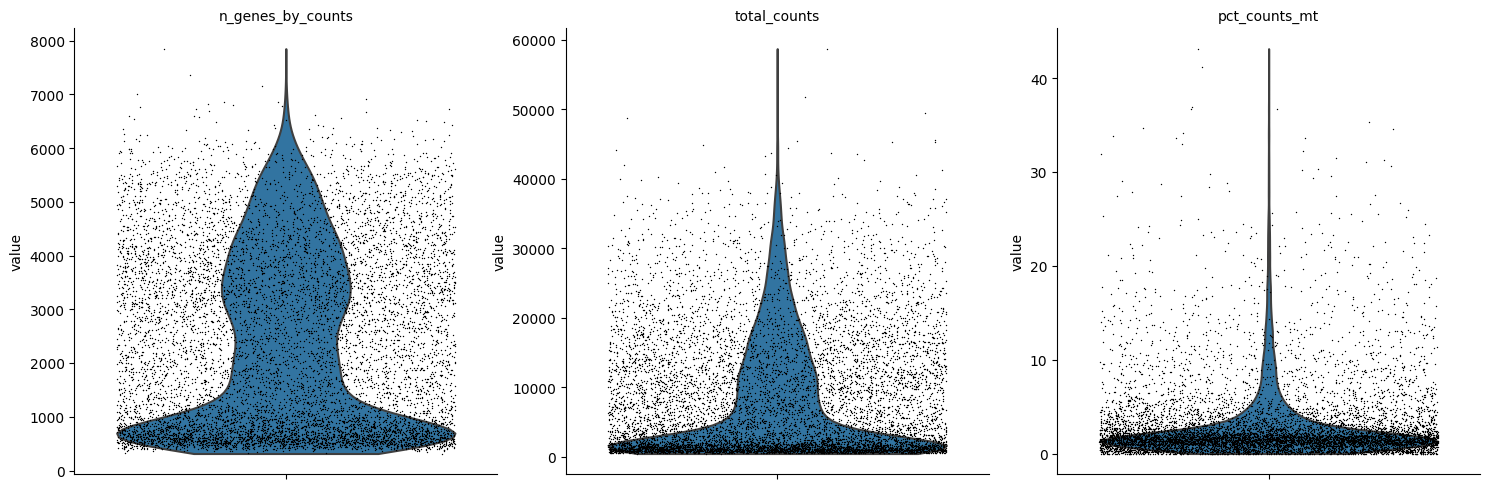

In [13]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [16]:
import dandelion as ddl

bcr = ddl.Dandelion(
    DATA_PATH / "vdj_b" / f"{sample}" / "dandelion" / "all_contig_dandelion.tsv"
)
bcr = bcr[bcr.metadata_names.isin(adata.obs_names)].copy()
bcr

/Users/uqztuong/Library/CloudStorage/OneDrive-TheUniversityofQueensland/Documents/GitHub/dandelion/dandelion/utilities/_utilities.py:582: DtypeWarning: Columns (116,117,118) have mixed types. Specify dtype option on import or set low_memory=False.


Dandelion class object with n_obs = 6819 and n_contigs = 18676
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'c_call', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'consensus_count', 'duplicate_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'j_support_igblastn', 'j_score_igblastn', 'j_call_igblastn', 'j_call_blastn', 'j_identity_blastn', 'j_alignment_length_bl

In [23]:
dict(bdata.obs["celltype"])

BC1-CpG_AAACCTGAGAAACCGC-1          B_CD21posCD23neg_non-proliferating
BC1-CpG_AAACCTGAGACAATAC-1          B_CD21posCD23neg_non-proliferating
BC1-CpG_AAACCTGAGATAGTCA-1                            B_CD21posCD23neg
BC1-CpG_AAACCTGAGCACAGGT-1                            B_CD21posCD23neg
BC1-CpG_AAACCTGAGCGCTTAT-1                                    B_Plasma
                                                   ...                
BC2-CD40-120h_TTTGTCATCAGAGCTT-1              B_CD21negCD23posCxcr4pos
BC2-CD40-120h_TTTGTCATCATTTGGG-1                             Ambiguous
BC2-CD40-120h_TTTGTCATCCGGCACA-1                              B_Plasma
BC2-CD40-120h_TTTGTCATCGTCACGG-1                             Ambiguous
BC2-CD40-120h_TTTGTCATCTCAACTT-1              B_CD21negCD23posCxcr4pos
Name: celltype, Length: 53648, dtype: category
Categories (7, object): ['Ambiguous', 'B1', 'B_CD21negCD23pos', 'B_CD21negCD23posCxcr4pos', 'B_CD21posCD23neg', 'B_CD21posCD23neg_non-proliferating', 'B_Plasma']

In [27]:
adata

AnnData object with n_obs × n_vars = 9221 × 32285
    obs: 'sample_id_actual', 'culture_id', 'Treatment', 'Timepoint', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'scrublet_score', 'is_doublet', 'filter_rna'
    var: 'gene_ids', 'feature_types'
    layers: 'counts'

In [28]:
annotation_dict = dict(bdata.obs["celltype"])
bcr.data["celltype"] = [annotation_dict[x] for x in bcr.data.cell_id]

# bcr.data.duplicate_count

In [29]:
for x in [
    "n_genes",
    "n_genes_by_counts",
    "total_counts",
    "total_counts_mt",
    "pct_counts_mt",
    "gmm_pct_count_clusters_keep",
    "scrublet_score",
    "is_doublet",
    "filter_rna",
]:
    anno_dict = dict(adata.obs[x])
    bcr.data[x] = [anno_dict[x] for x in bcr.data.cell_id]

In [31]:
df = bcr.data

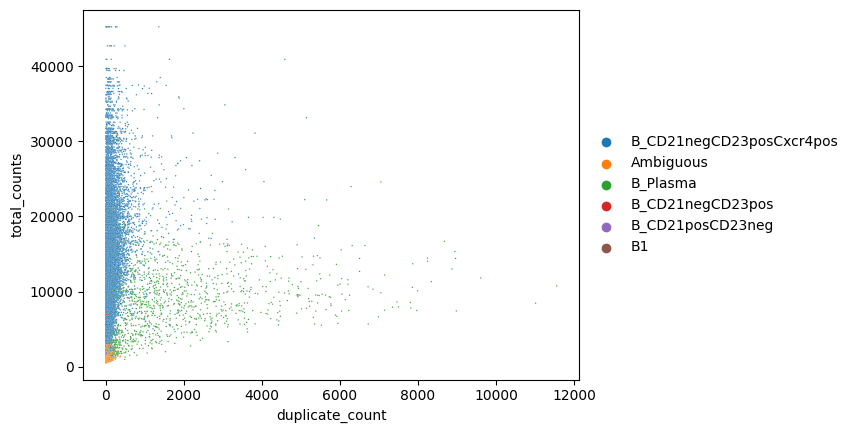

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="duplicate_count", y="total_counts", s=1, hue="celltype")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

In [44]:
bcr = ddl.pp.check_contigs(bcr)

Preparing data: 16169it [00:02, 6828.03it/s]
Scanning for poor quality/ambiguous contigs: 100%|██████████| 6730/6730 [00:14<00:00, 461.41it/s]


In [55]:
for x in ["chain_status", "locus_status"]:
    anno_dict = dict(bcr.metadata[x])
    bcr.data[x] = [
        anno_dict[x] if x in anno_dict else "ambiguous" for x in bcr.data.cell_id
    ]

In [57]:
df = bcr.data.copy()

In [60]:
import numpy as np

df["duplicate_count_log"] = np.log1p(df.duplicate_count)

In [95]:
dfx = df[
    df.cell_id.isin(df.cell_id.value_counts()[df.cell_id.value_counts() > 2].index)
].copy()

<Axes: xlabel='consensus_count', ylabel='duplicate_count'>

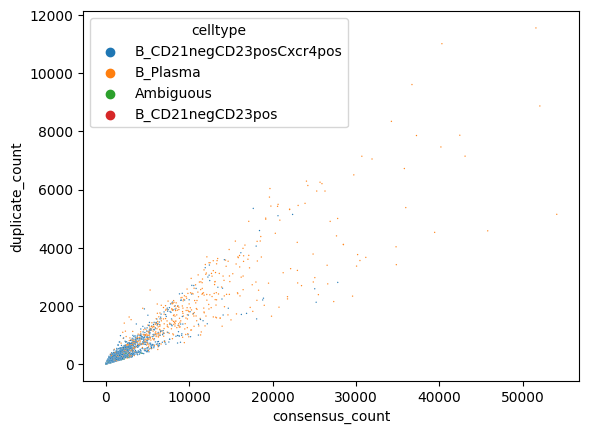

In [105]:
sns.scatterplot(data=dfx, x="consensus_count", y="duplicate_count", hue="celltype", s=1)

In [330]:
ATCGTAGC........TGATCGATCGTAGCTACAGTAGCTAGCTAGATGCTAGC.......TAGCTACGTAGCTAGCTAGCATCGATCG.......AGCTAGCTGACTGA........TCGATC

In [331]:
n_contigs = dict(df.cell_id.value_counts())
df["n_contigs"] = [n_contigs[x] for x in df.cell_id]

In [412]:
df["n_gaps"] = df.sequence_alignment.str.count("\.")
df["n_gaps_germline"] = df.germline_alignment.str.count("\.")

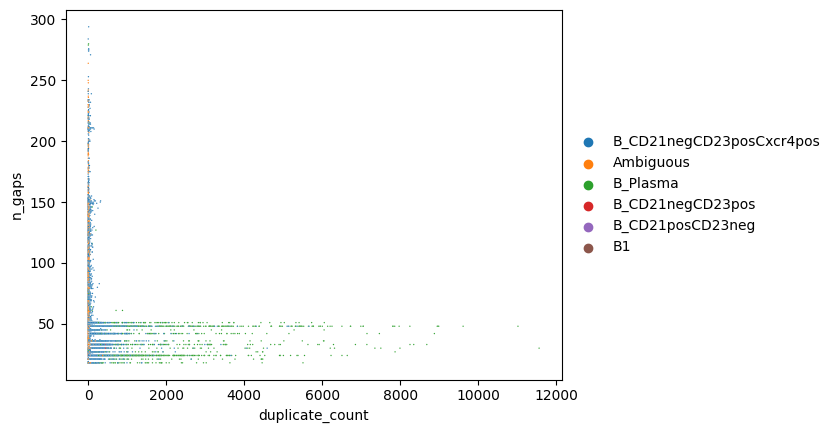

In [413]:
sns.scatterplot(data=df, x="duplicate_count", y="n_gaps", s=1, hue="celltype")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

In [434]:
from sklearn import mixture
from sklearn.preprocessing import StandardScaler

gmm = mixture.GaussianMixture(
    n_components=2, max_iter=1000, covariance_type="full", random_state=42
)
# Scale the data
scaler = StandardScaler()
X = df[["duplicate_count", "v_score", "j_score", "n_gaps", "n_contigs"]]
X_scaled = scaler.fit_transform(X)
res = gmm.fit(X_scaled).predict(X_scaled)
df["gmm_scaled"] = res
df["gmm_scaled"] = df["gmm_scaled"].astype("category")
pd.crosstab(df.gmm_scaled, df.ambiguous)

ambiguous,F,T
gmm_scaled,,
0,10790,1998
1,4055,1833


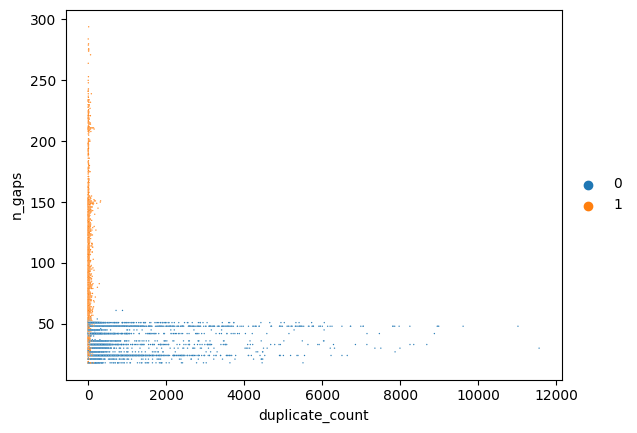

In [435]:
sns.scatterplot(data=df, x="duplicate_count", y="n_gaps", s=1, hue="gmm_scaled")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

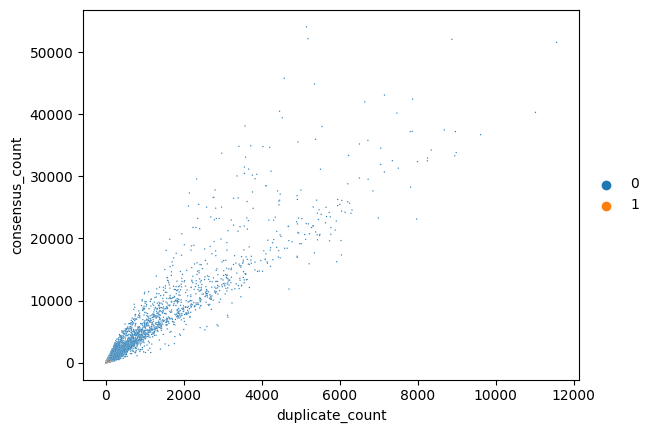

In [433]:
sns.scatterplot(
    data=df, x="duplicate_count", y="consensus_count", s=1, hue="gmm_scaled"
)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

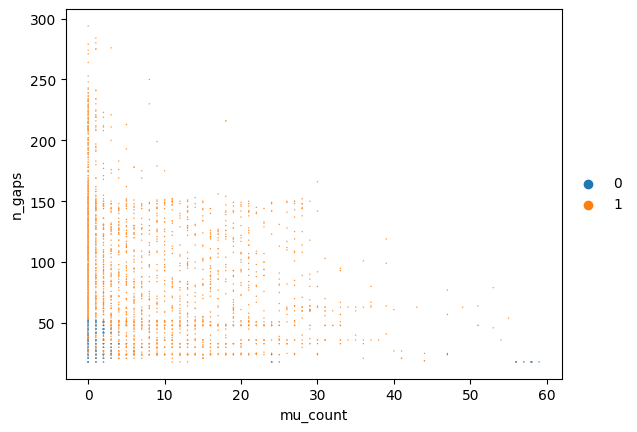

In [432]:
sns.scatterplot(data=df, x="mu_count", y="n_gaps", s=1, hue="gmm_scaled")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

In [436]:
# calulate this but collapse to cell level
df[df.gmm_scaled == 1].cell_id.value_counts()

BC1-CD40-120h_TGCCAAATCAAGCCTA-1    13
BC1-CD40-120h_GTTTCTAGTCGCATAT-1    13
BC1-CD40-120h_AGGGAGTCACAAGCCC-1    12
BC1-CD40-120h_AGGCCGTCACGCATCG-1    12
BC1-CD40-120h_AAAGATGGTCTACCTC-1    12
                                    ..
BC1-CD40-120h_CGGACTGAGGACATTA-1     1
BC1-CD40-120h_CGGACTGCACATGGGA-1     1
BC1-CD40-120h_CGGACTGCAGCATGAG-1     1
BC1-CD40-120h_CGGACTGCAGGCTCAC-1     1
BC1-CD40-120h_CTGATCCTCTAACCGA-1     1
Name: cell_id, Length: 3219, dtype: int64

In [437]:
# calulate this but collapse to cell level
df[df.gmm_scaled == 0].cell_id.value_counts()

BC1-CD40-120h_CTACACCGTTTCGCTC-1    6
BC1-CD40-120h_CGGAGTCTCAACACCA-1    6
BC1-CD40-120h_GATCGATAGGTGCACA-1    6
BC1-CD40-120h_CAAGGCCCAAGGACTG-1    6
BC1-CD40-120h_AGGCCACCAAGGTTCT-1    6
                                   ..
BC1-CD40-120h_GACCTGGCACGAAAGC-1    1
BC1-CD40-120h_GACCTGGTCACAGGCC-1    1
BC1-CD40-120h_GACCTGGTCGTAGGAG-1    1
BC1-CD40-120h_GACGCGTGTCTCCATC-1    1
BC1-CD40-120h_TTTGTCATCTTTAGTC-1    1
Name: cell_id, Length: 5962, dtype: int64

In [440]:
df.cell_id.value_counts()

BC1-CD40-120h_ATCATCTCAAACTGTC-1    14
BC1-CD40-120h_CAGGTGCAGACGCAAC-1    13
BC1-CD40-120h_TGCCAAATCAAGCCTA-1    13
BC1-CD40-120h_CACATAGCACGCCAGT-1    13
BC1-CD40-120h_GTTTCTAGTCGCATAT-1    13
                                    ..
BC1-CD40-120h_ATAAGAGAGAATTCCC-1     1
BC1-CD40-120h_GGGCACTCAATGGATA-1     1
BC1-CD40-120h_ATAAGAGCAAGGCTCC-1     1
BC1-CD40-120h_GGGCACTAGGTGATTA-1     1
BC1-CD40-120h_TTTGTCATCTTTAGTC-1     1
Name: cell_id, Length: 6819, dtype: int64

In [441]:
5962 / 6819

0.8743217480568999

<Axes: ylabel='Frequency'>

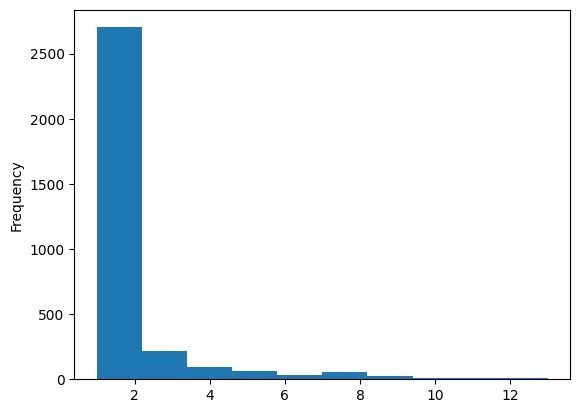

In [451]:
# calulate this but collapse to cell level
df[df.gmm_scaled == 1].cell_id.value_counts().plot.hist()

<Axes: ylabel='Frequency'>

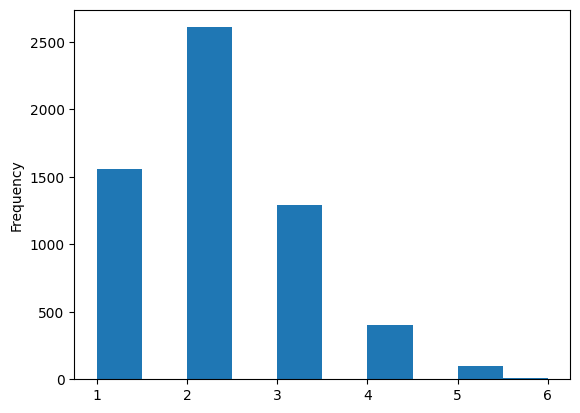

In [452]:
df[df.gmm_scaled == 0].cell_id.value_counts().plot.hist()

In [442]:
df.cell_id.value_counts().

count    6819.000000
mean        2.738818
std         1.602462
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        14.000000
Name: cell_id, dtype: float64

0    12573
1     6103
Name: gmm, dtype: int64

In [410]:
from sklearn import mixture
from sklearn.preprocessing import StandardScaler

gmm = mixture.GaussianMixture(
    n_components=2, max_iter=1000, covariance_type="full", random_state=42
)
# Scale the data
X = df[["duplicate_count", "v_score", "j_score", "n_gaps", ""]]
res = gmm.fit(X).predict(X)
df["gmm"] = res
df["gmm"] = df["gmm"].astype("category")
pd.crosstab(df.gmm, df.ambiguous)

ambiguous,F,T
gmm,,
0,4269,1680
1,10576,2151


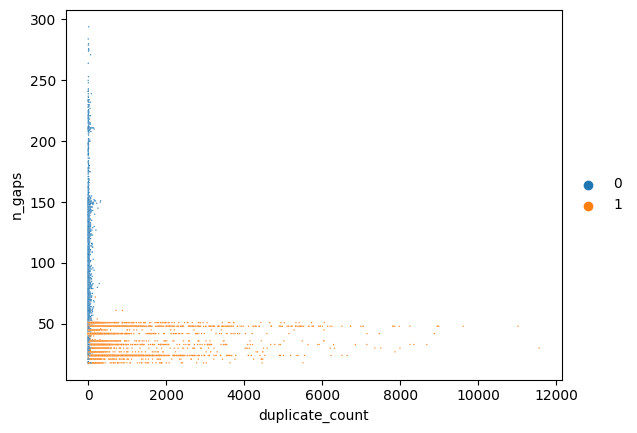

In [408]:
sns.scatterplot(data=df, x="duplicate_count", y="n_gaps", s=1, hue="gmm")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

In [ ]:
sns.scatterplot(data=df, x="duplicate_count", y="n_gaps", s=1, hue="gmm")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

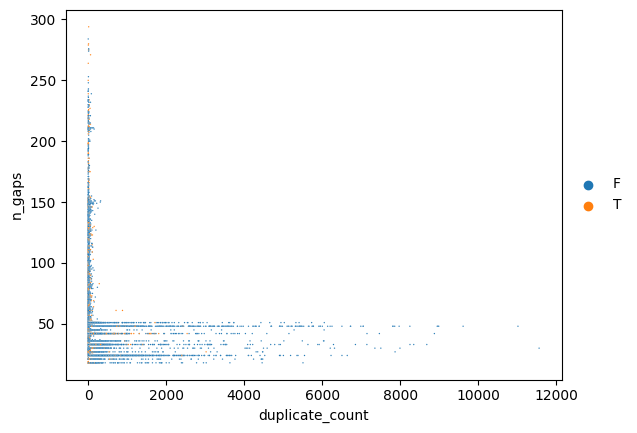

In [400]:
sns.scatterplot(data=df, x="duplicate_count", y="n_gaps", s=1, hue="ambiguous")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

In [398]:
pd.crosstab(df.ambiguous, df.gmm)

gmm,0,1
ambiguous,,
F,4269,10576
T,1680,2151


In [399]:
pd.crosstab(df.gmm_scaled, df.gmm)

gmm,0,1
gmm_scaled,,
0,307,12727
1,5642,0


In [335]:
bcr_adata = sc.AnnData(
    X=X.values,
    obs=df[
        [
            "ambiguous",
            "gmm",
            "celltype",
            "n_genes",
            "n_genes_by_counts",
            "total_counts",
            "total_counts_mt",
            "pct_counts_mt",
            "gmm_pct_count_clusters_keep",
            "scrublet_score",
            "is_doublet",
            "filter_rna",
        ]
    ],
    var=pd.DataFrame(
        index=[
            "duplicate_count",
            "consensus_count",
            "v_score",
            "j_score",
            "n_gaps",
            "n_contigs",
        ]
    ),
)
bcr_adata

AnnData object with n_obs × n_vars = 18676 × 6
    obs: 'ambiguous', 'gmm', 'celltype', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'scrublet_score', 'is_doublet', 'filter_rna'

In [336]:
sc.tl.pca(bcr_adata)

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


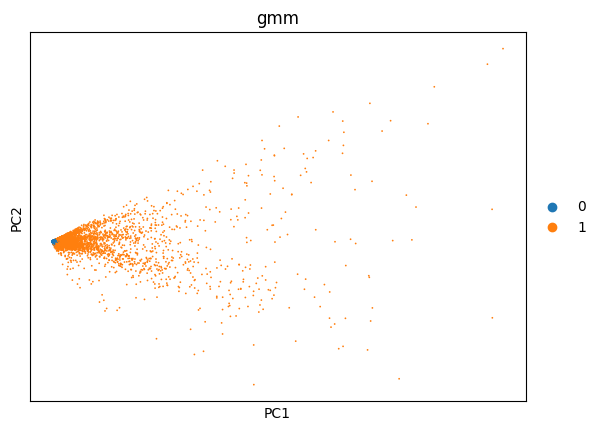

In [337]:
sc.pl.pca(bcr_adata, color="gmm")

In [338]:
sc.pp.neighbors(bcr_adata)

In [339]:
sc.tl.umap(bcr_adata)

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


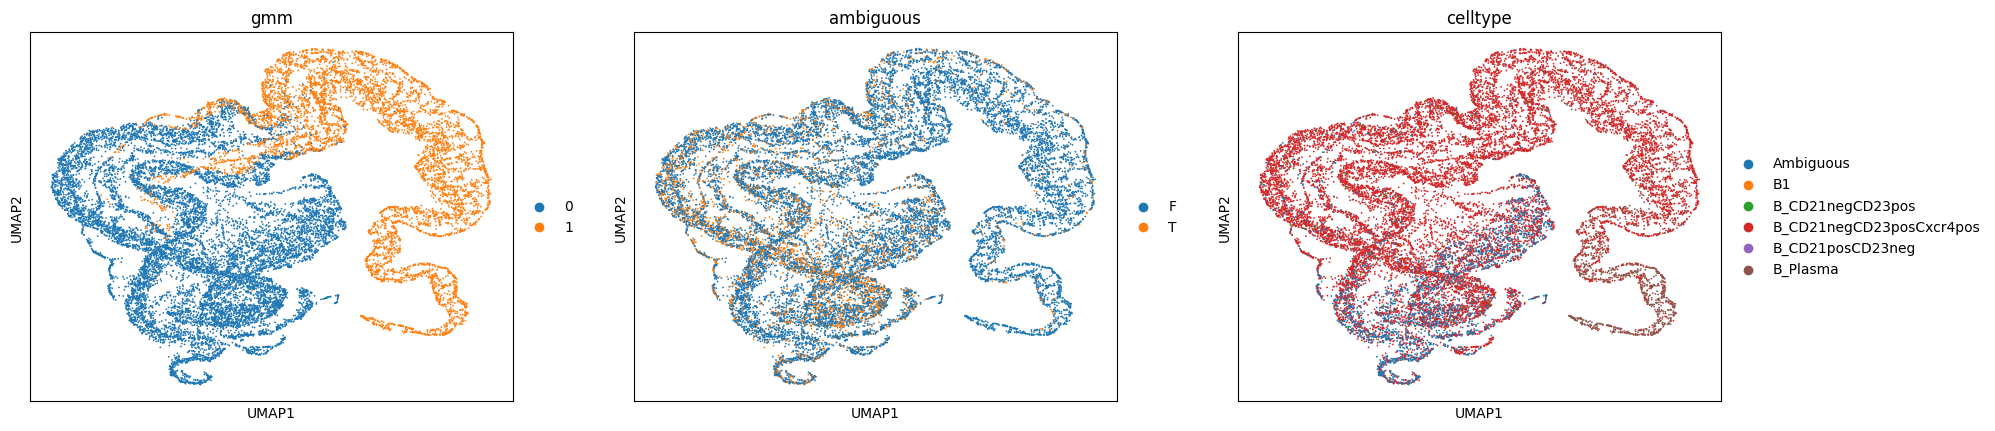

In [340]:
sc.pl.umap(bcr_adata, color=["gmm", "ambiguous", "celltype"])

In [255]:
df["gmm"].value_counts()

0    12573
1     6103
Name: gmm, dtype: int64

In [344]:
df[df["gmm"] == 1].cell_id.value_counts()

BC1-CD40-120h_GGGACCTAGCGCCTCA-1    5
BC1-CD40-120h_CAGCGACCACGTCTCT-1    5
BC1-CD40-120h_CACATTTAGAGGTTGC-1    5
BC1-CD40-120h_GGGCACTCACACAGAG-1    5
BC1-CD40-120h_CCTTACGTCCGAGCCA-1    5
                                   ..
BC1-CD40-120h_CATATGGCATCACGTA-1    1
BC1-CD40-120h_CATATGGGTACCGCTG-1    1
BC1-CD40-120h_GGACAAGAGCAGCCTC-1    1
BC1-CD40-120h_CATATGGGTTCGGGCT-1    1
BC1-CD40-120h_AAACCTGCAAATACAG-1    1
Name: cell_id, Length: 3688, dtype: int64

In [345]:
df[df["gmm"] == 0].cell_id.value_counts()

BC1-CD40-120h_TGCCAAATCAAGCCTA-1    13
BC1-CD40-120h_GTTTCTAGTCGCATAT-1    13
BC1-CD40-120h_TAGACCAGTTGATTGC-1    12
BC1-CD40-120h_AGGCCGTCACGCATCG-1    12
BC1-CD40-120h_AGGGAGTCACAAGCCC-1    12
                                    ..
BC1-CD40-120h_CTCAGAAAGTACGATA-1     1
BC1-CD40-120h_CTCAGAAGTACAGACG-1     1
BC1-CD40-120h_CTCATTAAGAAACCTA-1     1
BC1-CD40-120h_CTCATTAGTAGAAAGG-1     1
BC1-CD40-120h_TTTGTCATCTTTAGTC-1     1
Name: cell_id, Length: 5492, dtype: int64

In [276]:
df[df.cell_id == "BC1-CD40-120h_GATCGATCAAGCCCAC-1"][
    [
        "locus",
        "duplicate_count",
        "consensus_count",
        "total_counts",
        "n_genes_by_counts",
        "v_score",
        "j_score",
        "n_gaps",
        "mu_count",
        "mu_freq",
    ]
]

,locus,duplicate_count,consensus_count,total_counts,n_genes_by_counts,v_score,j_score,n_gaps,mu_count,mu_freq
sequence_id,,,,,,,,,,
BC1-CD40-120h_GATCGATCAAGCCCAC-1_contig_1,IGH,458,3212,18389.0,4155,459.0,91.1,24,0,0.000000
BC1-CD40-120h_GATCGATCAAGCCCAC-1_contig_2,IGK,323,1649,18389.0,4155,439.0,73.7,51,0,0.000000
BC1-CD40-120h_GATCGATCAAGCCCAC-1_contig_3,IGK,305,1501,18389.0,4155,463.0,73.7,36,0,0.000000
BC1-CD40-120h_GATCGATCAAGCCCAC-1_contig_4,IGH,279,1882,18389.0,4155,466.0,87.2,21,1,0.002899
BC1-CD40-120h_GATCGATCAAGCCCAC-1_contig_5,IGK,58,127,18389.0,4155,357.0,73.7,51,22,0.071197
BC1-CD40-120h_GATCGATCAAGCCCAC-1_contig_9,IGL,230,2266,18389.0,4155,459.0,73.7,42,0,0.000000


In [260]:
df[(df["gmm"] == 1) & (df.cell_id == "BC1-CD40-120h_GATCGATCAAGCCCAC-1")][
    [
        "locus",
        "duplicate_count",
        "consensus_count",
        "total_counts",
        "n_genes_by_counts",
        "v_score",
        "j_score",
        "n_gaps",
    ]
]

,locus,duplicate_count,consensus_count,total_counts,n_genes_by_counts,v_score,j_score,n_gaps
sequence_id,,,,,,,,
BC1-CD40-120h_GATCGATCAAGCCCAC-1_contig_1,IGH,458,3212,18389.0,4155,459.0,91.1,24
BC1-CD40-120h_GATCGATCAAGCCCAC-1_contig_2,IGK,323,1649,18389.0,4155,439.0,73.7,51
BC1-CD40-120h_GATCGATCAAGCCCAC-1_contig_3,IGK,305,1501,18389.0,4155,463.0,73.7,36
BC1-CD40-120h_GATCGATCAAGCCCAC-1_contig_4,IGH,279,1882,18389.0,4155,466.0,87.2,21
BC1-CD40-120h_GATCGATCAAGCCCAC-1_contig_9,IGL,230,2266,18389.0,4155,459.0,73.7,42


In [231]:
df[df.cell_id == "BC1-CD40-120h_TGCCAAATCAAGCCTA-1"][
    [
        "locus",
        "duplicate_count",
        "consensus_count",
        "total_counts",
        "n_genes_by_counts",
        "v_score",
        "j_score",
        "n_gaps",
    ]
]

,locus,duplicate_count,consensus_count,total_counts,n_genes_by_counts,v_score,j_score,n_gaps
sequence_id,,,,,,,,
BC1-CD40-120h_GTTTCTAGTCGCATAT-1_contig_10,IGK,40,114,10411.0,3546,374.0,73.7,93
BC1-CD40-120h_GTTTCTAGTCGCATAT-1_contig_5,IGK,31,65,10411.0,3546,433.0,73.7,55
BC1-CD40-120h_GTTTCTAGTCGCATAT-1_contig_2,IGH,29,183,10411.0,3546,470.0,89.1,21
BC1-CD40-120h_GTTTCTAGTCGCATAT-1_contig_1,IGH,14,92,10411.0,3546,459.0,91.1,24
BC1-CD40-120h_GTTTCTAGTCGCATAT-1_contig_9,IGH,14,54,10411.0,3546,392.0,91.1,53
BC1-CD40-120h_GTTTCTAGTCGCATAT-1_contig_4,IGK,11,33,10411.0,3546,286.0,73.7,149
BC1-CD40-120h_GTTTCTAGTCGCATAT-1_contig_12,IGH,10,48,10411.0,3546,444.0,91.1,24
BC1-CD40-120h_GTTTCTAGTCGCATAT-1_contig_8,IGK,8,20,10411.0,3546,346.0,73.7,36
BC1-CD40-120h_GTTTCTAGTCGCATAT-1_contig_3,IGK,8,47,10411.0,3546,467.0,73.7,33


gmm,0,1
ambiguous,,
F,9368,5477
T,3205,626


<Axes: xlabel='total_counts', ylabel='n_gaps'>

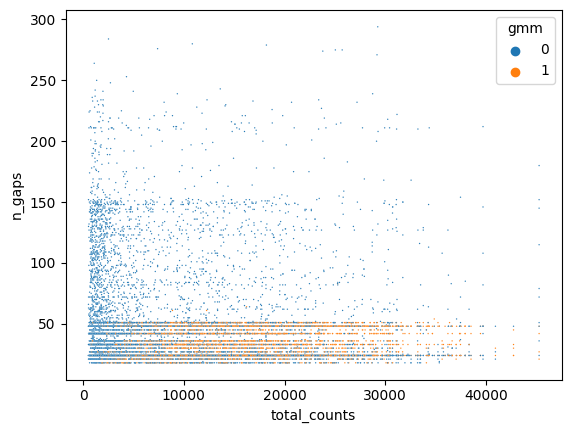

In [346]:
sns.scatterplot(data=df, x="total_counts", y="n_gaps", hue="gmm", s=1)

In [172]:
pd.crosstab(df.gmm, df.ambiguous)

ambiguous,F,T
gmm,,
0,10186,3380
1,4659,451


In [152]:
from sklearn import svm

,sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,...,gmm_pct_count_clusters_keep,scrublet_score,is_doublet,filter_rna,ambiguous,chain_status,locus_status,duplicate_count_log,contig_order,gmm
sequence_id,,,,,,,,,,,,,,,,,,,,,
BC1-CD40-120h_AAACCTGCAAATACAG-1_contig_1,BC1-CD40-120h_AAACCTGCAAATACAG-1_contig_1,AAAAACATGAGATCACAGTTCTCTCTACAGTTACTGAGCACACAGG...,F,T,IGHV1-64*01,NaN,IGHJ3*01,CAGGTCCAACTGCAGCAGCCTGGGGCT...GAGCTGGTAAAGCCTG...,CAGGTCCAACTGCAGCAGCCTGGGGCT...GAGCTGGTAAAGCCTG...,TGTGCAAGGCCTCACAGCTCATCCTGGTTTGCTTACTGG,...,False,0.176829,False,True,F,Single pair,IGH + IGK,4.663439,1,1
BC1-CD40-120h_AAACCTGCAAATACAG-1_contig_2,BC1-CD40-120h_AAACCTGCAAATACAG-1_contig_2,CACTAATTAGCCAGAGACCAAAATCCAAATACACAATGGACTTTCG...,F,T,IGKV4-86*01,NaN,IGKJ1*01,GAAATTGTGCTCACTCAGTCTCCAGCCATCACAGCTGCATCTCTGG...,GAAATTGTGCTCACTCAGTCTCCAGCCATCACAGCTGCATCTCTGG...,TGCCAGCAGTGGAATTATCCTCTTATGACGTTC,...,False,0.176829,False,True,F,Single pair,IGH + IGK,3.555348,2,1
BC1-CD40-120h_AAACCTGCAAATACAG-1_contig_3,BC1-CD40-120h_AAACCTGCAAATACAG-1_contig_3,GTCAGCTTCACACATGTTACACAGAGACATGAACATGCTCACTCAG...,F,F,IGKV12-98*01,NaN,IGKJ1*01,GACATTCAGATGACCCAGTCTCCTGCCTCCCAGTCTGCATCTCTGG...,GACATTCAGATGACCCAGTCTCCTGCCTCCCAGTCTGCATCTCTGG...,TGTCAACAACTTTACAGTACTCCTCTAGGACGTTC,...,False,0.176829,False,True,T,Single pair,IGH + IGK,4.204693,3,1
BC1-CD40-120h_AAACCTGCATACAGCT-1_contig_1,BC1-CD40-120h_AAACCTGCATACAGCT-1_contig_1,CACTCAGGTCCTGGGGTTGCTGCTGCTGTGGCTTACAGATGCCAGA...,F,T,IGKV12-46*01,NaN,IGKJ2*01,GACATCCAGATGACTCAGTCTCCAGCCTCCCTATCTGTATCTGTGG...,GACATCCAGATGACTCAGTCTCCAGCCTCCCTATCTGTATCTGTGG...,TGTCAACATTTTTGGGGTACTCCGTACACGTTC,...,False,0.077739,False,True,F,Orphan VJ,Orphan Extra VJ,2.397895,1,1
BC1-CD40-120h_AAACCTGCATACAGCT-1_contig_2,BC1-CD40-120h_AAACCTGCATACAGCT-1_contig_2,TTAGCATGGTATCAGCAGAAACAGGGAAAATCTCCTCAGCTCCTGG...,F,T,IGKV12-46*01,NaN,IGKJ4*01,.................................................,GACATCCAGATGACTCAGTCTCCAGCCTCCCTATCTGTATCTGTGG...,TGCCAACAGGGTAATACGCTTCCATTCACGTTC,...,False,0.077739,False,True,F,Orphan VJ,Orphan Extra VJ,2.197225,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BC1-CD40-120h_TTTGTCATCACCGTAA-1_contig_1,BC1-CD40-120h_TTTGTCATCACCGTAA-1_contig_1,CTTATATGGGGAAGCTGGCTATCACTCAAGGCCATGACCATGCTCT...,F,T,IGKV17-127*01,NaN,IGKJ4*01,GAAACAACTGTGACCCAGTCTCCAGCATCCCTGTCCGTGGCTACAG...,GAAACAACTGTGACCCAGTCTCCAGCATCCCTGTCCGTGGCTACAG...,TGTTTGCAAAGTGATAACATGCCTCTCACGTTC,...,True,0.096386,False,False,F,Single pair,IGH + IGK,9.099409,1,0
BC1-CD40-120h_TTTGTCATCACCGTAA-1_contig_2,BC1-CD40-120h_TTTGTCATCACCGTAA-1_contig_2,ATCAGGACTGAACACAGACCAGTCACCATGTACTTCAGGCTCAGCT...,F,T,IGHV5-16*01,"IGHD2-5*01,IGHD2-6*01",IGHJ1*03,GAAGTGAAGCTGGTGGAGTCTGAGGGA...GGCTTAGTGCAGCCTG...,GAAGTGAAGCTGGTGGAGTCTGAGGGA...GGCTTAGTGCAGCCTG...,TGTGCAAGAGATGACGGCTATAGTAACTACGCCCACTGGTACTTCG...,...,True,0.096386,False,False,F,Single pair,IGH + IGK,8.041735,2,0
BC1-CD40-120h_TTTGTCATCCCATTAT-1_contig_1,BC1-CD40-120h_TTTGTCATCCCATTAT-1_contig_1,TGGGGGACAGAGGCACCTAACTGTGGACTCACAAGTCTTTCCCTTC...,F,T,IGHV6-3*01,"IGHD2-4*01,IGHD2-9*02",IGHJ2*01,GAAGTGAAGCTTGAGGAGTCTGGAGGA...GGCTTGGTGCAACCTG...,GAAGTGAAGCTTGAGGAGTCTGGAGGA...GGCTTGGTGCAACCTG...,TGCACAGTCCATGATTACGATGACTACTGG,...,True,0.132262,False,False,F,Single pair,IGH + IGK,5.231109,1,1


<Axes: xlabel='celltype', ylabel='duplicate_count'>

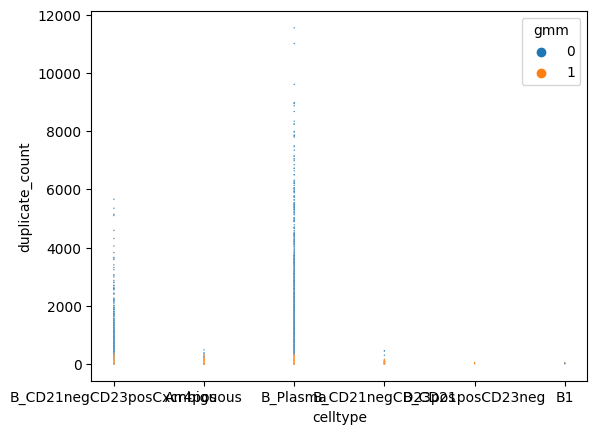

In [153]:
sns.scatterplot(data=df, x="celltype", y="duplicate_count", hue="gmm", s=1)

In [107]:
df.v_identity

sequence_id
BC1-CD40-120h_AAACCTGCAAATACAG-1_contig_1    1.00000
BC1-CD40-120h_AAACCTGCAAATACAG-1_contig_2    1.00000
BC1-CD40-120h_AAACCTGCAAATACAG-1_contig_3    1.00000
BC1-CD40-120h_AAACCTGCATACAGCT-1_contig_1    1.00000
BC1-CD40-120h_AAACCTGCATACAGCT-1_contig_2    0.86705
                                              ...   
BC1-CD40-120h_TTTGTCATCACCGTAA-1_contig_1    1.00000
BC1-CD40-120h_TTTGTCATCACCGTAA-1_contig_2    1.00000
BC1-CD40-120h_TTTGTCATCCCATTAT-1_contig_1    1.00000
BC1-CD40-120h_TTTGTCATCCCATTAT-1_contig_2    1.00000
BC1-CD40-120h_TTTGTCATCTTTAGTC-1_contig_1    1.00000
Name: v_identity, Length: 18676, dtype: float64

In [71]:
bcr.data.cell_id = ["x" + x for x in bcr.data.cell_id]

In [72]:
bcr.metadata

,sample_id,locus_VDJ,locus_VJ,productive_VDJ,productive_VJ,v_call_genotyped_VDJ,d_call_VDJ,j_call_VDJ,v_call_genotyped_VJ,j_call_VJ,...,d_call_B_VDJ_main,j_call_B_VDJ_main,v_call_B_VJ_main,j_call_B_VJ_main,isotype,isotype_status,locus_status,chain_status,rearrangement_status_VDJ,rearrangement_status_VJ
BC1-CD40-120h_AAACCTGCAAATACAG-1,G000421_batch2_1,IGH,IGK,T,T,IGHV1-64,None,IGHJ3,IGKV4-86,IGKJ1,...,None,IGHJ3,IGKV4-86,IGKJ1,IgE,IgE,IGH + IGK,Single pair,standard,standard
BC1-CD40-120h_AAACCTGCATACAGCT-1,G000421_batch2_1,None,IGK|IGK,None,T|T,None,None,None,IGKV12-46|IGKV12-46,IGKJ2|IGKJ4,...,None,None,IGKV12-46,IGKJ2,None,None,Orphan Extra VJ,Orphan VJ,None,standard
BC1-CD40-120h_AAACCTGCATCATCCC-1,G000421_batch2_1,IGH,IGK,T,T,IGHV1-82,None,IGHJ1,IGKV4-86,IGKJ2,...,None,IGHJ1,IGKV4-86,IGKJ2,IgE,IgE,IGH + IGK,Single pair,standard,standard
BC1-CD40-120h_AAACCTGCATCCGGGT-1,G000421_batch2_1,None,IGK|IGK,None,T|T,None,None,None,IGKV6-13|IGKV13-85,IGKJ5|IGKJ1,...,None,None,IGKV6-13,IGKJ5,None,None,Orphan Extra VJ,Orphan VJ,None,standard
BC1-CD40-120h_AAACCTGGTATAGGTA-1,G000421_batch2_1,IGH|IGH,IGK|IGK,T|T,T|T,IGHV1-50|IGHV1-80,None,IGHJ2|IGHJ2,IGKV3-7|IGKV1-117,IGKJ1|IGKJ5,...,None,IGHJ2,IGKV3-7,IGKJ1,IgE,IgE,Extra VDJ + Extra VJ,Extra pair,standard,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BC1-CD40-120h_TTTGTCAGTTAAGTAG-1,G000421_batch2_1,IGH,IGK,T,T,IGHV8-8,IGHD1-1,IGHJ4,IGKV9-120,IGKJ2,...,IGHD1-1,IGHJ4,IGKV9-120,IGKJ2,IgG,IgG,IGH + IGK,Single pair,standard,standard
BC1-CD40-120h_TTTGTCATCAAAGTAG-1,G000421_batch2_1,IGH,IGK,T,T,IGHV8-12,IGHD3-2,IGHJ2,IGKV6-13,IGKJ5,...,IGHD3-2,IGHJ2,IGKV6-13,IGKJ5,IgE,IgE,IGH + IGK,Single pair,standard,standard
BC1-CD40-120h_TTTGTCATCACCGTAA-1,G000421_batch2_1,IGH,IGK,T,T,IGHV5-16,"IGHD2-5,IGHD2-6",IGHJ1,IGKV17-127,IGKJ4,...,"IGHD2-5,IGHD2-6",IGHJ1,IGKV17-127,IGKJ4,IgE,IgE,IGH + IGK,Single pair,standard,standard
BC1-CD40-120h_TTTGTCATCCCATTAT-1,G000421_batch2_1,IGH,IGK,T,T,IGHV6-3,"IGHD2-9,IGHD2-4",IGHJ2,IGKV4-59,IGKJ1,...,"IGHD2-9,IGHD2-4",IGHJ2,IGKV4-59,IGKJ1,IgE,IgE,IGH + IGK,Single pair,standard,standard


In [73]:
bcr.update_metadata()

In [75]:
bcr.metadata

,sample_id,locus_VDJ,locus_VJ,productive_VDJ,productive_VJ,v_call_genotyped_VDJ,d_call_VDJ,j_call_VDJ,v_call_genotyped_VJ,j_call_VJ,...,d_call_B_VDJ_main,j_call_B_VDJ_main,v_call_B_VJ_main,j_call_B_VJ_main,isotype,isotype_status,locus_status,chain_status,rearrangement_status_VDJ,rearrangement_status_VJ
xBC1-CD40-120h_AAACCTGCAAATACAG-1,G000421_batch2_1,IGH,IGK,T,T,IGHV1-64,None,IGHJ3,IGKV4-86,IGKJ1,...,None,IGHJ3,IGKV4-86,IGKJ1,IgE,IgE,IGH + IGK,Single pair,standard,standard
xBC1-CD40-120h_AAACCTGCATACAGCT-1,G000421_batch2_1,None,IGK|IGK,None,T|T,None,None,None,IGKV12-46|IGKV12-46,IGKJ2|IGKJ4,...,None,None,IGKV12-46,IGKJ2,None,None,Orphan Extra VJ,Orphan VJ,None,standard
xBC1-CD40-120h_AAACCTGCATCATCCC-1,G000421_batch2_1,IGH,IGK,T,T,IGHV1-82,None,IGHJ1,IGKV4-86,IGKJ2,...,None,IGHJ1,IGKV4-86,IGKJ2,IgE,IgE,IGH + IGK,Single pair,standard,standard
xBC1-CD40-120h_AAACCTGCATCCGGGT-1,G000421_batch2_1,None,IGK|IGK,None,T|T,None,None,None,IGKV6-13|IGKV13-85,IGKJ5|IGKJ1,...,None,None,IGKV6-13,IGKJ5,None,None,Orphan Extra VJ,Orphan VJ,None,standard
xBC1-CD40-120h_AAACCTGGTATAGGTA-1,G000421_batch2_1,IGH|IGH,IGK|IGK,T|T,T|T,IGHV1-50|IGHV1-80,None,IGHJ2|IGHJ2,IGKV3-7|IGKV1-117,IGKJ1|IGKJ5,...,None,IGHJ2,IGKV3-7,IGKJ1,IgE,IgE,Extra VDJ + Extra VJ,Extra pair,standard,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xBC1-CD40-120h_TTTGTCAGTTAAGTAG-1,G000421_batch2_1,IGH,IGK,T,T,IGHV8-8,IGHD1-1,IGHJ4,IGKV9-120,IGKJ2,...,IGHD1-1,IGHJ4,IGKV9-120,IGKJ2,IgG,IgG,IGH + IGK,Single pair,standard,standard
xBC1-CD40-120h_TTTGTCATCAAAGTAG-1,G000421_batch2_1,IGH,IGK,T,T,IGHV8-12,IGHD3-2,IGHJ2,IGKV6-13,IGKJ5,...,IGHD3-2,IGHJ2,IGKV6-13,IGKJ5,IgE,IgE,IGH + IGK,Single pair,standard,standard
xBC1-CD40-120h_TTTGTCATCACCGTAA-1,G000421_batch2_1,IGH,IGK,T,T,IGHV5-16,"IGHD2-5,IGHD2-6",IGHJ1,IGKV17-127,IGKJ4,...,"IGHD2-5,IGHD2-6",IGHJ1,IGKV17-127,IGKJ4,IgE,IgE,IGH + IGK,Single pair,standard,standard
xBC1-CD40-120h_TTTGTCATCCCATTAT-1,G000421_batch2_1,IGH,IGK,T,T,IGHV6-3,"IGHD2-9,IGHD2-4",IGHJ2,IGKV4-59,IGKJ1,...,"IGHD2-9,IGHD2-4",IGHJ2,IGKV4-59,IGKJ1,IgE,IgE,IGH + IGK,Single pair,standard,standard
